<a href="https://colab.research.google.com/github/Padmashree02/Face_Detection-Res10/blob/main/Main_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
#imported required libraries

import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline

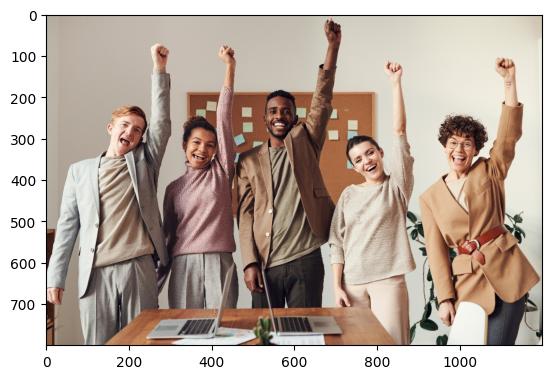

In [20]:
#Load the image for the input data purpose
input=cv2.imread('/content/Input.jpg')

#Display the image by swaping BGR to RGB format
plt.imshow(input[:,:,::-1])

In [29]:
#Load the model
config='/content/deploy.prototxt'  #text file- network configuration
model='/content/res10_300x300_ssd_iter_140000_fp16.caffemodel' #binary file - trained weights

#read the model or neural network
model=cv2.dnn.readNetFromCaffe(caffeModel=model,prototxt=config)

In [30]:
#convert the image into network understanding format (blob)
blob= cv2.dnn.blobFromImage(image=input, scalefactor=1.0, size=(300,300), mean=(104,117,123), swapRB=False, crop=False,)

#Set the input data to the DenseNet model
model.setInput(blob)

#Pass the blob Forward to the DenseNet model
detections=model.forward()

In [23]:
#Necessary defination of values

#Default threshold value
detection_threshold=0.5

#define the height and width wrt image's dimension
input1=input.copy()
h=input.shape[0]
w=input.shape[1]

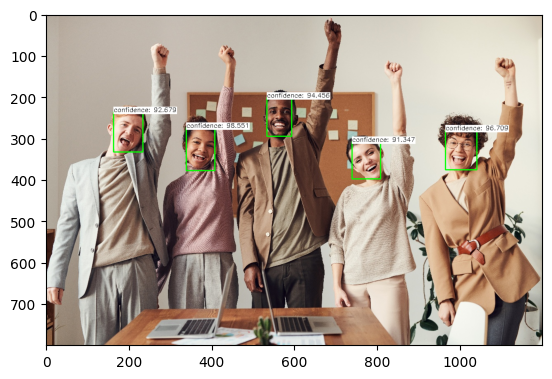

In [31]:
#Face detection process

#process each detection
for i in range(detections.shape[2]):

  #Extract the confidence score
  confidence=detections[0,0,i,2]

  #Ensure whether the detected box has well detected face
  if confidence>detection_threshold:

    #extracting bounding box's dimensions into "box" list
    box=detections[0,0,i,3:7]*np.array([w,h,w,h])

    #spliting the box's values into x1,y1,x2,y2 in int data type
    (x1,y1,x2,y2)=box.astype('int')

    #Draw the bounding box of the detected face
    cv2.rectangle(input1,(x1,y1),(x2,y2),(0,255,0),2)

    #Draw the box to display the confidence score of the detection
    confidence=confidence*100
    label='confidence: %.3f' % confidence
    label_size,base_line=cv2.getTextSize(label,fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.5,thickness=1)
    cv2.rectangle(input1,(x1,y1-label_size[1]),(x1+label_size[0],y1+base_line),(255,255,255),cv2.FILLED)
    cv2.putText(input1,label,(x1,y1),fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.5,color=(0,0,0))

#Display the face detection result of the image
plt.imshow(input1[:,:,::-1])

In [32]:
#Save the output image
cv2.imwrite("Face_detection.jpg",input1)

True